# <FONT SIZE=4 COLOR="blue"> 1. Objetivos de la sesión: </FONT>

✔  En esta sesión revisaremos algunos conceptos fundamentales de Machine Learning como por ejemplo, conjunto de entrenamiento, conjunto de prueba, métrica de evaluación, validación cruzada (cross-validation),  hiperparámetros, entre otros.

✔ Por otro lado, estudiaremos en qué consisten los problemas de clasificación y estudiaremos el primer modelo clásico de este tipo: los *k-vecinos más cercanos*. Además, estudiaremos la matriz de confusión y las diferentes métricas como el *recall* , *accuracy*, *precision*, etc.


# <FONT SIZE=4 COLOR="blue"> 2. Conceptos básicos de Machine Learning 1 </FONT>

En está sección revisaremos algunos conceptos básicos de machine learning en los cuales se profundizará en lo que sigue el script.

<FONT SIZE=3 COLOR="green"> a. Algoritmos de clasificación: </FONT> son conjuntos de técnicas de aprendizaje supervisado, en el cual el resultado que queremos predecir, es decir, las "etiquetas" (variable $\mathbf{y}$), es discreto.

<br>

<FONT SIZE=3 COLOR="green"> b. Variable Objetivo: </FONT> también denominada **variable de respuesta**. En un algoritmo de aprendizaje de máquina supervisado, es la variable que queremos predecir (por lo general, denotada como $\mathbf{y}$). Esta puede ser discreta o continua. En el primer caso, da lugar a algoritmos de ***clasificación*** y en el segundo caso a algoritmos de ***regresión***.

<br>

<FONT SIZE=3 COLOR="green"> c. Variable Predictora: </FONT> también denominada **features**, son las variables que se usarán para predecir la variable objetivo. Estas se denotan como

$$\mathbf{X}=\{X_1,X_2, \dots, X_n \}$$

<br>

<FONT SIZE=3 COLOR="green"> d. Conjunto de Entrenamiento: </FONT> es el subconjunto de registros que se selecciona para entrenar el modelo. Este conjunto consta de dos partes:

- $X_{train}$ : conjunto de entrenamiento de los predictores o *features*.

- $y_{train}$: conjunto de entrenamiento de la variable objetivo asociada al conjunto $X_{train}$.

El conjunto de entrenamiento se selecciona de manera aleatoria y por lo general se toma el $70\%$ , $75\%$ y $80 \%$.

<br>

<FONT SIZE=3 COLOR="green"> e. Conjunto de Prueba o Validación: </FONT>: Es el subconjunto de registros que se selecciona para validar el modelo. Consta de dos partes:

- $X_{test}$ : conjunto de validación de los predictores o *features*.

- $y_{test}$: conjunto de validación de la variable objetivo asociada al conjunto $X_{test}$.

El tamaño de este conjunto es el complemento de los conjuntos de entrenamiento.

<br>

<FONT SIZE=3 COLOR="green"> f. Matriz de Confusión:</FONT> Herramienta usada para evaluar el rendimiento del modelo. (se ampliará más adelante las métricas y conceptos).

<br>

<FONT SIZE=3 COLOR="green"> g. Hiperparámetro: </FONT> son variables de configuración externa al modelo original (general) que se pueden ajustar para entrenar el modelo. (revisaremos este concepto en cada modelo que se aborde en el curso)


<center><FONT SIZE=4 COLOR="BLUE"> ESQUEMA GENERAL DE CLASIFICACIÓN EN MACHINE LEARNING </FONT></center>
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/ESQUEMA%20DE%20CLASIFICACI%C3%93N.png?raw=true" alt="centered image" width="600" height="350"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>


Para el trabajo de esta sesión y las próximas usaremos

***Python:***

- Lenguaje de programación de alto nivel.

- Tiene una curva de aprendizaje rápida. Es ideal para las personas que se están viculando al mundo del Machine Learning.

- Es un lenguaje de propósito general y colaborativo, ya que es open source.

- Python tiene módulos para carga de datos, visualización, estadísticas, procesamiento de lenguaje natural, procesamiento de imágenes, entre muchas más herramientas.  

**[scikit-learn](https://scikit-learn.org/stable/)**

- Es un proyecto de código abierto.

- Contiene una serie de algoritmos de machine learning, así como documentación completa sobre cada algoritmo.

Vamos a revisar la versión que tenemos en colab.

In [1]:
## Version de python en Colab
!python --version

Python 3.10.6


También revisamos la versión de *scikit-learn*

In [2]:
## Version scikit-learn
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\usuario\appdata\local\programs\python\python310\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


A continuación, revisaremos en detalle uno de los primeros algoritmos de machine learning y con este ilustraremos algunos conceptos y herramientas que aplican también para otros algortimos de clasificación.

# <FONT SIZE=4 COLOR="blue"> 3. Algoritmo de clasificación KNN : K-vecinos más cercanos </FONT>

En esta sección revisaremos el algoritmo de clasificación ***KNN: k-nearest neigbors*** : K-vecinos más cercanos. A continuación, algunas observaciones del modelo.

- Es uno de los algoritmos más sencillos de Machine Learning (a veces denominado de aprendizaje flojo).

- Es un algoritmo de tipo supervisado

- Utiliza todo el conjunto de datos para entrenar "cada punto" y requiere mucha memoria y recursos de cómputo.

- Funciona bien para conjuntos de datos no tan grandes y sin tantas variables.


## <FONT SIZE=4 COLOR="blue"> 3.1 ¿En qué consiste? </FONT>

Este algoritmo consiste en consiste en clasificar los valores de una variable categórica de acuerdo con los vecinos más cercanos. A continuación explicaremos el funcionamiento

1. Supongamos que queremos clasificar el cuadrado amarillo en las dos posibles clases.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn1.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Libro Guía  </FONT> <figcaption></center>




2. Por ejemplo, si tenemos otro valor de $k$ la clasificación puede cambiar.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn2.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Libro Guía  </FONT> <figcaption></center>



## <FONT SIZE=4 COLOR="blue"> 3.2 Descripción del algoritmo: pseudocódigo </FONT>

- Determinar el valor de $k$.

- Calcular la distancia del punto a clasificar a todos los otros puntos.

- Ordenar de manera ascendente las distancias.

- Tomar los puntos más cercanos al punto a clasificar de acuerdo con el valor que le asignemos a $k$.

- Contar cuántos puntos de cada clase están en la vecindad y definimos por mayoría.

- Por ejemplo: Si k es 3 y tenemos

   + Distancia 1 : 2.5 : clase a

   + Distancia 2 : 2.51 : clase b

   + Distancia 3 : 2.53 : clase a

  Conclusión: El punto se clasifica en la clase a.

En caso de que haya empate se pueden definir algunos criterios de desempate. Por ejemplo:

  - la clase que contenga al vecino más cercano.
  - la clase con la distancia media más pequeña.

## <FONT SIZE=4 COLOR="blue"> 3.3 Sobre el algoritmo </FONT>

A continuación, algunos puntos importantes que se deben tener en cuenta sobre el algoritmo *knn*

1. Observe que no se genera un modelo que sea consecuencia de un entrenamiento previo, sino que el aprendizaje se da en el mismo momento en el que se prueban los datos de validación. A este tipo de algoritmos se les denomina ***lazy learning methods***.

2. Como utiliza todo el set de entrenamiento para calcular las distancias, se tiene un costo computacional alto.

3. Es un algoritmo que da buenos resultados, pero es recomendable para conjuntos de datos no tan grandes.

4. Es muy sensible al valor de $k$ y a la distancia seleccionada.

5. Es importante escalar los datos.

## <FONT SIZE=4 COLOR="blue"> 3.4 Sobre las distancias </FONT>

El algoritmo $knn$ está fundamentado en la distancia entre dos puntos. Si bien, una de las distancias más conocida es la distancia euclideana, existen otras distancias que se pueden usar para el algoritmo.

## <FONT SIZE=3 COLOR="magenta"> Distancia Euclideana </FONT>

$$ \left (\sum \limits_{i=1}^m (x_i-y_i)^2 \right)^{1/2}$$

Esta métrica se puede usar para variables con valores discretos o continuos en general.

## <FONT SIZE=3 COLOR="magenta"> Distancia de Manhattan</FONT>

$$ \sum \limits_{i=1}^{m} |x_i-y_i|$$

Observe que es más sencilla que la euclideana (tiene menos cálculos)

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn3.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>

La métrica euclideana y de Manhattan tienen una generalización que se denomina.

## <FONT SIZE=3 COLOR="magenta"> Distancia de Minkowski</FONT>

$$ \left (\sum \limits_{i=1}^m (x_i-y_i)^p \right)^{1/p}$$

## <FONT SIZE=3 COLOR="magenta"> Distancia de Hamming</FONT>

$$Distancia \,\, Hamming : \begin{cases} 0 & \text{si $x=y$} \\ 1 & \text{si $x \neq y$}   \end{cases}$$

Esta distancia es equivalente a la de Manhattan para variables binarias, es decir, que solo tienen ceros y unos

$$ a = \begin{pmatrix} 1 \\ 0 \\ 1 \\ 1 \end{pmatrix}  \qquad b = \begin{pmatrix} 0 \\ 1 \\ 1 \\ 1 \end{pmatrix}$$

## <FONT SIZE=3 COLOR="magenta"> Distancia Euclideana con pesos </FONT>

$$ \left (\sum \limits_{i=1}^m w_i(x_i-y_i)^2 \right)^{1/2}$$

donde los pesos resultan, por ejemplo, del escalamiento de los datos.



## <FONT SIZE=4 COLOR="blue"> 3.5 Sobre los valores de $k$ </FONT>

Un parámetro muy importante en el algoritmo de *knn* es el valor de $k$.  Inicialmente, no hay una forma general de escogerlo, sin embargo

- Si se toma un valor de $k$ muy pequeño se puede sobreajustar (overfitting).

- Si el valor de $k$ es muy grande sucede lo contrario. Será más dificil clasificar.

- Se recomienda **Tunear** (optimizar) el hiperparámetro $k$. Se dice hiperparámetro ya que es un parámetro que se utiliza para entrenar el modelo.

## <FONT SIZE=4 COLOR="blue"> 3.6 Sobre el escalamiento </FONT>

El algoritmo *knn* está fundamentado en seleccionar mínimas distancias, en ese orden de ideas, observe lo siguiente.

- Si se tiene una variable $X_1$ que varía en $[1,2]$ y otra variable $X_2$ que varía en $[1000, 2000]$. Al calcular distancias con los valores de estas variables $X_2$ dominará a $X_1$ que tiene valores más pequeños y como la algoritmo utiliza la distancia para clasificar entonces queda sesgado el resultado.

Por lo anterior, se deben escalar las variables predictoras y en general se usan las siguientes dos funciones.

## <FONT SIZE=3 COLOR="blue"> StandardScaler </FONT>

$$\dfrac{X-\mu}{\sigma}$$


## <FONT SIZE=3 COLOR="blue"> MaxminScaler </FONT>

$$\dfrac{X-X_{min}}{X_{max}-X_{min}}$$





A continuación, revisaremos un ejemplo donde ilustraremos los conceptos, el código de programación y otros elementos importantes.

# <FONT SIZE=5 COLOR="blue"> 4. Ejemplo Práctico </FONT>

- En esta sección haremos un ejemplo práctico.

- Iniciaremos indicando las librerías que debemos usar.

## <FONT SIZE=4 COLOR="blue"> 4.1 Librerías de trabajo </FONT>

In [1]:
# Manipulación de data.frames
import pandas as pd
import numpy as np

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# Para aplicar k-nearest neiborg
from sklearn.neighbors          import KNeighborsClassifier

# Métricas de evaluación
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 4.2 Contexto del problema </FONT>

Vamos a considerar un conjunto de datos de *kaggle* que se pueden encontrar en este link:  [DATOS 📰](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

**Acerca del conjunto de datos**

Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen.

<br>
<center><img src="https://healthdataminer.com/wp-content/uploads/2019/11/celulas-palomas.png?raw=true" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: https://healthdataminer.com/analitica-en-accion/modelos-no-supervisados-en-salud-clusterizando-celulas/ </FONT> <figcaption></center>

En el espacio tridimensional es el descrito en: [KP Bennett y OL Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Información de atributos:

1) Número de identificación

2) Diagnóstico (M = maligno, B = benigno)

3-32). Se calculan diez características de valor real para cada núcleo celular:

   - a) radio (media de las distancias desde el centro a los puntos del perímetro)
   - b) textura (desviación estándar de los valores de la escala de grises)
   - c) perímetro
   - d) área
   - e) uniformidad (variación local en las longitudes del radio)
   - f) compacidad (perímetro^2 / área - 1.0)
   - g) concavidad (severidad de las porciones cóncavas del contorno)
   - h) puntos cóncavos (número de porciones cóncavas del contorno)
   - i) simetría
   - j) dimensión fractal ("aproximación de la línea de costa" - 1)

La media, el error estándar y el "peor" o mayor (media de los tres
valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es *Mean Radius*, el campo 13 es *Radius SE*, el campo 23 es *Worst Radius*.

- Todos los valores de características se recodifican con cuatro dígitos significativos.

- Faltan valores de atributo: ninguno

- Distribución de clases: 357 benignos, 212 malignos

**Objetivo del ejercicio:** Determinar si una mujer tiene un diagnóstico de tumor maligno o benigno de acuerdo con una serie de valores de las características presentes en las imágenes celulares.


## <FONT SIZE=4 COLOR="blue"> 4.4 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

In [2]:
url ="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/cancer_clasificacion.csv"

In [3]:
cancer = pd.read_csv(url, sep = ";")

In [4]:
cancer.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,...,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,...,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,...,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,...,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,...,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678
5,843786,M,12.45,15.70,82.57,477.1,1.278,0.170,1.578,8.089,...,15.47,23.75,103.40,741.6,1.791,5.249,5.355,1.741,3.985,1.244
6,844359,M,18.25,19.98,119.60,1040.0,9.463,109.000,1.127,74.000,...,22.88,27.66,153.20,1606.0,1.442,2.576,3.784,1.932,3.063,8.368


## <FONT SIZE=4 COLOR="blue"> 4.5 Exploración de los datos </FONT>

En esta sección exploraremos un poco los datos para entenderlos mejor

In [ ]:
# revisaremos los primeros registros
cancer.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,...,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,...,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,...,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,...,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,...,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678
5,843786,M,12.45,15.70,82.57,477.1,1.278,0.170,1.578,8.089,...,15.47,23.75,103.40,741.6,1.791,5.249,5.355,1.741,3.985,1.244


In [ ]:
# revisamos el nombre de las columnas
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# revisamos el tamaño de los datos
cancer.shape

(569, 32)

In [ ]:
# revisamos si hay datos faltantes
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# revisamos el tipo de variables
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

La variable *id* de la identificación no nos aportará información relevante, entonces la eliminaremos

In [5]:
# usamos .drop , axis =1 para columnas e inplace =T para que sobreescriba
cancer.drop("id", axis = 1, inplace = True)

Verificamos

In [6]:
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,...,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,...,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,...,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,...,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,...,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


Ahora, podemos sacar unas estadísticas generales de las variables cuantitativas.

In [ ]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,53.418260,28.886329,40.97464,36.058367,18.432831,64.298601,...,16.269190,25.677223,107.261213,880.583128,14.057726,33.590564,39.535367,43.891974,32.661968,56.040787
std,3.524049,4.301036,24.298981,351.914129,192.691499,117.510703,142.13157,123.109612,53.388748,182.029228,...,4.833242,6.146258,33.602542,569.356993,55.312800,114.565888,132.220929,154.494270,89.988802,190.731370
min,6.981000,9.710000,43.790000,143.500000,0.100000,0.060000,0.00000,0.000000,0.180000,0.060000,...,7.930000,12.020000,50.410000,185.200000,0.130000,0.100000,0.000000,0.000000,0.210000,0.120000
25%,11.700000,16.170000,75.170000,420.300000,1.137000,1.436000,1.68400,1.967000,1.632000,5.853000,...,13.010000,21.080000,84.110000,515.300000,1.223000,1.843000,1.916000,1.595000,2.527000,6.609000
50%,13.370000,18.840000,86.240000,551.100000,8.293000,4.458000,3.13600,3.515000,1.813000,6.232000,...,14.970000,25.410000,97.660000,686.500000,1.377000,2.884000,3.469000,2.701000,2.871000,7.628000
75%,15.780000,21.800000,104.100000,782.700000,9.383000,7.542000,6.18100,7.583000,2.035000,6.899000,...,18.790000,29.720000,125.400000,1084.000000,1.562000,5.213000,6.121000,7.763000,3.313000,8.553000
max,28.110000,39.280000,188.500000,2501.000000,997.000000,958.000000,973.00000,974.000000,304.000000,898.000000,...,36.040000,49.540000,251.200000,4254.000000,997.000000,937.000000,942.000000,991.000000,544.000000,997.000000


Observe que la variable **diagnosis** tiene dos categorías. M y B : Maligno y Benigno.

- Vamos a codificar estas categorías y

- Revisaremos la distribución de estas clases.

In [7]:
# codificamos M como 1 y B como 0
cancer["diagnosis"] = cancer["diagnosis"].replace({ "M": 1 , "B" : 0})

In [8]:
# La tabla de frecuencias la podemos hacer con
cancer.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

Convertimos a data.frame

In [9]:
A=cancer.diagnosis.value_counts().to_frame()
A

,count
diagnosis,
0,357
1,212


Hacemos la gráfica de barras de las frecuencias

In [10]:
# gráfica con plotly express
px.bar(cancer.diagnosis.value_counts())

**Cuidado 🍳**: En esta parte hay que tener especial atención,  particularmente en otros algoritmos. Cuando los datos están desbalanceados pueden afectar los resultados. Para esto usaremos en las próximas sesiones : *subsampling*, *oversampling* y *smote*. Los anteriores son técnicas de balanceo.

- Para continuar con el ejercicio, trabajaremos con las clases como están.

Finalmente, haremos una visualización de los datos así:

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sw

In [ ]:
reporte=sw.analyze(cancer, target_feat="diagnosis")

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
from IPython.display import HTML
reporte.show_html()
HTML("SWEETVIZ_REPORT.html")

## <FONT SIZE=4 COLOR="blue"> 4.6 Conjunto de Entrenamiento y Prueba </FONT>

- **data training:** Datos que usamos para entrenar el modelo.

- **testing data:** Datos que reservamos para comprobar si el modelo generado a partir de los datos funciona

Normalmente, usamos $70\%-30\%$ / $80\%-20\%$

In [15]:
cancer.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,...,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,1,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,...,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,1,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,...,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,1,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,...,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,1,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,...,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In [11]:
# Dividir en dos conjuntos
# las variables predictoras
X = cancer.iloc[:, 1:]
# la variable objetivo
y = cancer.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.2)          # tamaño del conjunto de prueba

Veamos los tamaños de estos conjuntos

In [12]:
print("El tamaño de X_train es {}".format(X_train.shape))
print("El tamaño de y_train es: {}".format(y_train.shape))
print("El tamaño de X_test es {}".format(X_test.shape))
print("El tamaño de y_test es: {}".format(y_test.shape))

El tamaño de X_train es (455, 30)
El tamaño de y_train es: (455,)
El tamaño de X_test es (114, 30)
El tamaño de y_test es: (114,)


Exploremos alguno de ellos.

In [18]:
X_train[0:10]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,10.05,17.53,64.41,310.8,1.007,7.326,2.511,1.775,189.000,6.331,...,11.16,26.84,71.98,384.0,1.402,1.402,1.055,6.499,2.894,7.664
427,10.80,21.98,68.79,359.9,8.801,5.743,3.614,1.404,2.016,5.977,...,12.76,32.04,83.69,489.5,1.303,1.696,1.927,7.485,2.965,7.662
406,16.14,14.86,104.30,800.0,9.495,8.501,55.000,4.528,1.735,5.875,...,17.71,19.58,115.90,947.9,1.206,1.722,231.000,1.129,2.778,7.012
96,12.18,17.84,77.79,451.1,1.045,7.057,249.000,2.941,0.190,6.635,...,12.83,20.92,82.14,495.2,114.000,9.358,498.000,5.882,2.227,7.376
490,12.25,22.44,78.18,466.5,8.192,52.000,1.714,1.261,1.544,5.976,...,14.17,31.99,92.74,622.9,1.256,1.804,123.000,6.335,0.310,8.203
384,13.28,13.72,85.79,541.8,8.363,8.575,5.077,2.864,1.617,5.594,...,14.24,17.37,96.59,623.7,1.166,2.685,2.866,9.173,2.736,732.000
281,11.74,14.02,74.24,427.3,7.813,434.000,2.245,2.763,2.101,6.113,...,13.31,18.26,84.70,533.7,1.036,85.000,6.735,829.000,3.101,6.688
325,12.67,17.30,81.25,489.9,1.028,7.664,3.193,2.107,1.707,5.984,...,13.71,21.10,88.70,574.4,1.384,1.212,102.000,5.602,2.688,6.888
190,14.22,23.12,94.37,609.9,1.075,2.413,1.981,6.618,2.384,7.542,...,15.74,37.18,106.40,762.4,1.533,9.327,8.488,1.772,5.166,1.446
380,11.27,12.96,73.16,386.3,1.237,1.111,79.000,555.000,2.018,6.914,...,12.84,20.53,84.93,476.1,161.000,2.429,2.247,1.318,3.343,9.215


## <FONT SIZE=4 COLOR="blue"> 4.7 Escalar las variables predictoras </FONT>

- En los algoritmos donde se vea involucrada una distancia es importante hacer el escalamiento.

- Una recomendación es hacer el escalamiento después de dividir en entrenamiento y prueba. Ya que la idea es que no se sobreentrene el modelo.


In [13]:
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

**Observación importante de lo anterior**.

a. Para $X_{train}$ usamos ***fit.transform*** esto significa que los datos se este conjunto se escalarán con base a su $\mu$ media y $\sigma$ desviación estándard. (que no son lo mismo que calcularla sobre todo el conjunto)

b. Para $X_{test}$ usamos ***.transform*** esto significa que para escalar los datos del conjunto de prueba se usan los parámetros $\mu$ y $\sigma$ obtenidos en la parte a. con el conjunto de entrenamiento $X_{train.}$

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn4.png?raw=true?" alt="centered image" width="600" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>



## <FONT SIZE=4 COLOR="blue"> 4.8 Selección de $k$  </FONT>

- Un valor razonable para intentar trabajar será : $$\sqrt{n}$$, con $n$ el tamaño del conjunto de entrenamiento.

- Podemos ensayar con otros valores de $k$ y ver el rendimiento del modelo.

In [14]:
import math
math.sqrt(len(y_test))

10.677078252031311

## <FONT SIZE=4 COLOR="blue"> 4.9 Generar el Modelo  </FONT>

En esta parte usaremos la librería *sciki-learn* y la función *KNeighborsClassifier*

In [15]:
KNN = KNeighborsClassifier(n_neighbors = 10,              # número de vecinos k=10
                           metric = 'euclidean')          # métrica euclideana
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

## <FONT SIZE=4 COLOR="blue"> 4.10 Evaluar en el conjunto de Prueba  </FONT>

Luego de tener el modelo entrenado con **X_{train}** y **y_{train}** pasamos a calcularlo en el conjunto **X_{test}**, con lo cual obtendremos valores de predicción del modelo.

In [16]:
y_pred = KNN.predict(X_test)
y_pred

  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

La pregunta que nos hacemos ahora es:

***¿Qué tanta coincidencia hay en el modelo con los datos de prueba?***

La respuesta a esta pregunta la tendremos justamente comparando **$y_{pred}$** con **$y_{test}$**. Esto lo haremos con una herramienta muy importante en Machine Learning y modelos de clasificación denominada ***matriz de confusión***.

# <FONT SIZE=5 COLOR="blue"> 5. Matriz de Confusión </FONT>

En el campo del Machine Lerning la **matriz de confusión** es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado.

- Las columnas de la matriz representa el número de predicciones de cada clase.

- Las filas representan las instancias en la clase real.

Esta matriz permite ver qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

En el siguiente gráfico se muestra lo anterior

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/metricas.png?raw=true" alt="centered image" width="500" height="400"></center>
<br>

Para entender la matriz de confusión debemos definir dos conceptos:

**Exactitud:** Mide cuánto se aproximan los resultados al valor verdadero

**Precisión:** Mide cuánto se aproximan los datos entre sí.

Veamos algunas definiciones

**Verdadero positivo:** El valor real es positivo y la prueba predice tambien que es positivo.

- La persona estaba enferma y el modelo predice bien que estaba enferma. *Prediccón correcta*

**Verdadero negativo:** El valor real es negativo y la prueba predice tambien que el resultado es negativo.

- La persona no está enferma y el modelo predice que no está enferma. *Predicción correcta*

**Falso negativo:** El valor real es positivo, y la prueba predice que el resultado es negativo.

- La persona esta enferma y el modelo predice que no lo está. *predicción incorrecta* : error tipo II

**Falso positivo:** El valor real es negativo, y la prueba predice que el resultado es positivo.

- La persona no está enferma y el modelo predice que lo está. *predicción incorrecta* : error tipo I

Veamos las métricas que se utilizan para evaluar el modelo.

**Accuracy** : Exactitud

- La Exactitud (en inglés, “Accuracy”) se refiere a lo cerca que está el resultado de una medición del valor verdadero.

- Es el porcentaje de predicciones correctas de todo el modelo.

- En términos estadísticos, la exactitud está relacionada con el sesgo de una estimación.

- Es la proporción de resultados verdaderos (tanto verdaderos positivos (VP) como verdaderos negativos (VN)) dividido entre el número total de casos examinados (verdaderos positivos, falsos positivos, verdaderos negativos, falsos negativos)

$$Accurary = \dfrac{VP+VN}{VP+FN+VN+FP}$$

**Precision** : Precisión

- La Precisión (en inglés “Precision”)  se refiere a la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud.

- A mayor precisión menos es la dispersión.

- Es la proporción de verdaderos positivos dividido entre los resultados etiquetados como positivos.

- Es el porcentaje de casos reales positivos dentro de los casos positivos detectados.

$$Precision = \dfrac{VP}{VP+FP}$$

**Recall**: sensibilidad

- Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.

$$recall = \dfrac{VP}{VP+FN}$$

*En el área de la salud se dice que la sensibilidad o recall es la capacidad de de poder detectar correctamente la enfermedad entre los enfermos*

**Especifity**

- Es la proporción de casos negativos que fueron correctamente identificadas por el algoritmo.

$$Especifity = \dfrac{VN}{VN+FP}$$

*En el area de la salud se dice que la especificidad es la capacidad de poder identificar los casos de pacientes sanos entre todos los sanos*

**F1 Score:**

- Esta una métrica muy empleada porque nos resume la precisión y sensibilidad en una sola métrica. Por ello es de gran utilidad cuando la distribución de las clases es desigual, por ejemplo cuando el número de pacientes con una condición es del 15% y el otro es 85%.

$$F1 = \dfrac{2*precision*recall}{precision+recall} $$

$$ F1= \dfrac{2}{ \dfrac{1}{precision}+\dfrac{1}{recall}} $$

Resumen:

**Alta precisión y alto recall**: el modelo de Machine Learning escogido maneja perfectamente esa clase.

**Alta precisión y bajo recall**: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

**Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

**Baja precisión y bajo recall**: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

***Observación importante***

- Cuando se tiene un conjunto de datos con clases **desbalanceadas**, suele ocurrir que obtenemos un alto valor de precisión en la clase mayoritaria y un bajo recall en la clase Minoritaria.  En el campo de la salud ésta circunstancia es particularmente frecuente y se debe recurrir al balanceo de clases.

Consejos generales sobre La matriz de confusión y sus métricas:

1,) La precisión es un gran estadístico, pero es útil únicamente cuando se tienen conjuntos de datos simétricos (la cantidad de casos de la clase 1 y de las clase 2 tienen magnitudes similares)

2.) El indicador F1 de la matriz de confusión es útil si se tiene una distribución de clases desigual.

3.) Elija mayor precisión para conocer qué tan seguro está de los verdaderos positivos, Mientras que la sensibilidad o “Recall” le servirá para saber si no está perdiendo positivos.

4.) Las Falsas Alarmas:  Por ejemplo,  si cree que es mejor en su caso tener falsos positivos que falsos negativos, utilice una sensibilidad alta  (Recall) , cuando la aparición de falsos negativos le resulta inaceptable pero no le importa tener falsos positivos adicionales (falsas alarmas).

Un ejemplo de esto es:  Prefieres que algunas personas sanas sean etiquetadas como diabéticas en lugar de dejar a una persona diabética etiquetada como sana.

5.)  Elija precisión (precision en inglés)  si quiere estar más seguro de sus verdaderos positivos. por ejemplo, correos electrónicos no deseados.  En este caso se prefiere tener algunos correos electrónicos “no deseados” en su bandeja de entrada en lugar de tener correos electrónicos “reales” en su bandeja de SPAM.

6.) Elija alta Especificidad:  si desea identificar los verdaderos negativos, o lo que es igual cuando no desea falsos positivos. Por ejemplo conductores  y las pruebas de alcoholemia

Referencia : https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/




Con base a lo anterior vamos a construir la matriz de confusión

In [17]:
confusion_matrix(y_test, y_pred)

array([[65,  2],
       [11, 36]], dtype=int64)

Text(0.5, 36.72222222222221, 'Predicciones')

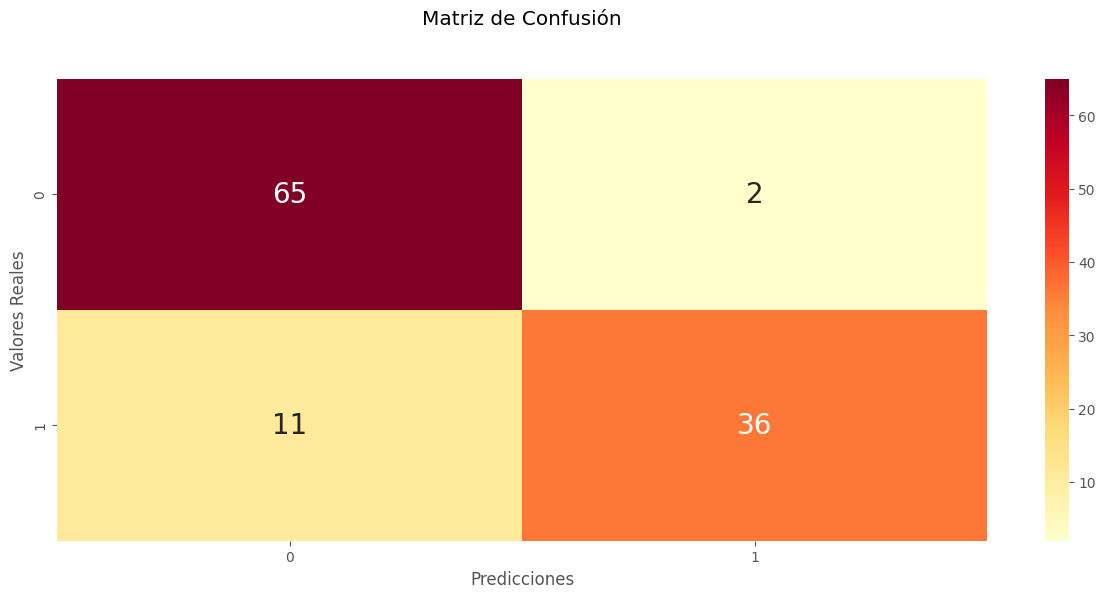

In [18]:
from sklearn import metrics
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

Vamos a calcular la precisión del modelo

In [19]:
#accuracy score
print(accuracy_score(y_test,y_pred))

0.8859649122807017


Revisaremos las otras métricas

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        67
           1       0.95      0.77      0.85        47

    accuracy                           0.89       114
   macro avg       0.90      0.87      0.88       114
weighted avg       0.89      0.89      0.88       114



**Conclusiones**:

- El modelo está clasificando bien al $89%$ de los registros.

- El *recall* es $77\%$, es decir, de las personas que tienen tumor maligno, el algoritmo detecta el $77\%$.

# <FONT SIZE=5 COLOR="blue"> 5. Predicción en KNN </FONT>



Particularmente, en estos algoritmos en los que se debe escalar, es importante escalar los valores a predecir. Este escalamiento se hace con base a $X_{train}$

In [21]:
X_new = np.array([[16.4,10.30,121.8,1001,0.1084,0.3076,0.3001,0.1371,0.2419,0.07871,1.2,0.9053,8.589,153.4,0.006399,0.05904,0.05373,0.01587,0.03003,0.006093,23.38,15.33,182.6,2019,0.1622,0.6756,0.7119,0.2554,0.4501,0.1170]])
X_news = (X_new-X_train.mean())/(X_train.std())
X_news
# escalar.transform(X_new)

array([[1.640e+01, 1.030e+01, 1.218e+02, 1.001e+03, 1.084e-01, 3.076e-01,
        3.001e-01, 1.371e-01, 2.419e-01, 7.871e-02, 1.200e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 5.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.093e-03, 2.338e+01, 1.533e+01, 1.826e+02, 2.019e+03,
        1.622e-01, 6.756e-01, 7.119e-01, 2.554e-01, 4.501e-01, 1.170e-01]])

In [22]:
KNN.predict(X_news)

array([1], dtype=int64)

# <FONT SIZE=5 COLOR="blue"> 6. Optimicemos el valor de k </FONT>

Para esto podemos programar una función que itere sobre $k$ de la siguiente manera.

([<matplotlib.axis.XTick at 0x1e4fb7aed70>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

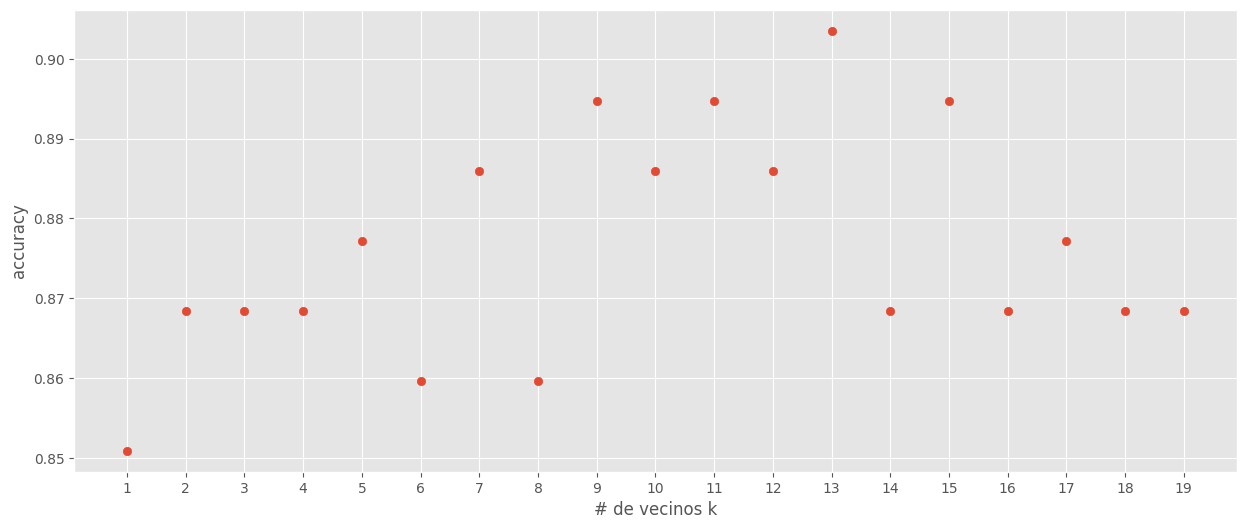

In [23]:
k_range = range(1, 20) # rango de k. k desde 1 a 20.
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel("# de vecinos k")
plt.ylabel("accuracy")
plt.scatter(k_range, scores)
plt.xticks(range(1,20))

# <FONT SIZE=5 COLOR="blue"> 8. Ejemplo en clase: clasificación de las especies de iris </FONT>
Vamos a abordar una primera aplicación de machine learning creando nuestro primer modelo. Repita los pasos anteriores con este conjunto de datos.

Supongamos que un jardinero está interesado en distinguir las especies de algunas flores de `iris` que ha encontrado. El jardinero ha recopilado algunas medidas asociadas con cada `iris`:

- _El largo de los pétalos (petal length.)_
- _El ancho de los pétalos (petal width)._
- _El largo de los sépalos (sepal length)._
- _El ancho de los sépalos (sepal width)._

Todo lo anterior medido en centímetros

También tiene las medidas de los `iris` que han sido previamente identificados por un experto botánico como perteneciente a las especies:

- _setosa._
- _versicolor._
- _virginica._

Supongamos que estas son las únicas especies que nuestro jardinero aficionado encontrará en la naturaleza.

***Objetivo:*** Construir un modelo de machine learning que pueda aprender de las mediciones de estos lirios cuya especie se conoce, de modo que podamos predecir la especie para un nuevo `iris`.

***Ayuda:***


Los datos que se usarán son los consignados en el DataFrame `Iris` un clásico de clásicos en los ejemplos de machine learning y estadística. En el módulo `datasets` de scikit-learn podemos obtener el conjunto de datos.

A continuación, se hacen una indicaciones de cómo revisar el conjunto *iris* ya que está en formato diccionario desde la librería.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(6)

In [ ]:
# vamos a hacer una copia del conjunto de datos.
df = iris_df.copy()
# agregamos la última columna de la variable objetivo
df['target_name'] = iris.target
# podemos codificar
df["target_name"] = df['target_name'].replace({0:"setosa",1:"versicolor",2:"virginica"})
df

1. Realizar el analisis descriptivo de la base (distribucion de las clases)
2. Separacion de la informacion en test y train
3. Realizar estandarizacion
4. Realizar el entrenamiento  (Buscar cual es mejor k para el problema -> utilizar el grafico de accuracy )
5. Calcular matriz de confuncion y las respectivas metricas.
6. Realizar inferencia.